<h2 style="text-align: center;">Task Set 4</h2>
<h1 style="text-align: center;">Relationships between points</h1>

#### 1.  Wczytanie potrzebnych pakietów

In [1]:
library("spatstat")

Ładowanie wymaganego pakietu: spatstat.data

Ładowanie wymaganego pakietu: spatstat.univar

spatstat.univar 3.1-1

Ładowanie wymaganego pakietu: spatstat.geom

spatstat.geom 3.3-4

Ładowanie wymaganego pakietu: spatstat.random

spatstat.random 3.3-2

Ładowanie wymaganego pakietu: spatstat.explore

Ładowanie wymaganego pakietu: nlme

spatstat.explore 3.3-3

Ładowanie wymaganego pakietu: spatstat.model

Ładowanie wymaganego pakietu: rpart

spatstat.model 3.3-3

Ładowanie wymaganego pakietu: spatstat.linnet

spatstat.linnet 3.2-3


spatstat 3.3-0 
For an introduction to spatstat, type 'beginner' 




Wyróżniamy 3 klasyczne techniki do badania relacji pomiędzy punktami, które oparte są na pomiarze odległości pomiędzy punktami:

- **Pairwise distances** – Odległości wzajemne, liczone pomiędzy wszystkimi odrębnymi parami punktów $( x_i )$ oraz $( x_j )$ $( i \neq j )$:
  $$
  s_{ij} = ||x_i - x_j||
  $$

- **Nearest neighbour distances** – Odległość pomiędzy każdym punktem $( x_i )$ do najbliższego sąsiada:
  $$
  t_i = \min_{j \neq i}s_{ij}
  $$

- **Empty space distances** – Odległość od ustalonego miejsca odniesienia $( u )$ w oknie do najbliższego punktu danych.

W R funkcje te są zaimplementowane odpowiednio w pakiecie `spatstat` jako: `pairdist()`, `nndist()`, `distmap()`.


#### 2. Utworzenie zbioru punktowego nr 1

Utwórz zbiór punktowy o rozkładzie niezależnym (p_poisson) w oknie o promieniu 10. Zdefiniuj samodzielnie
intensywność procesu. 

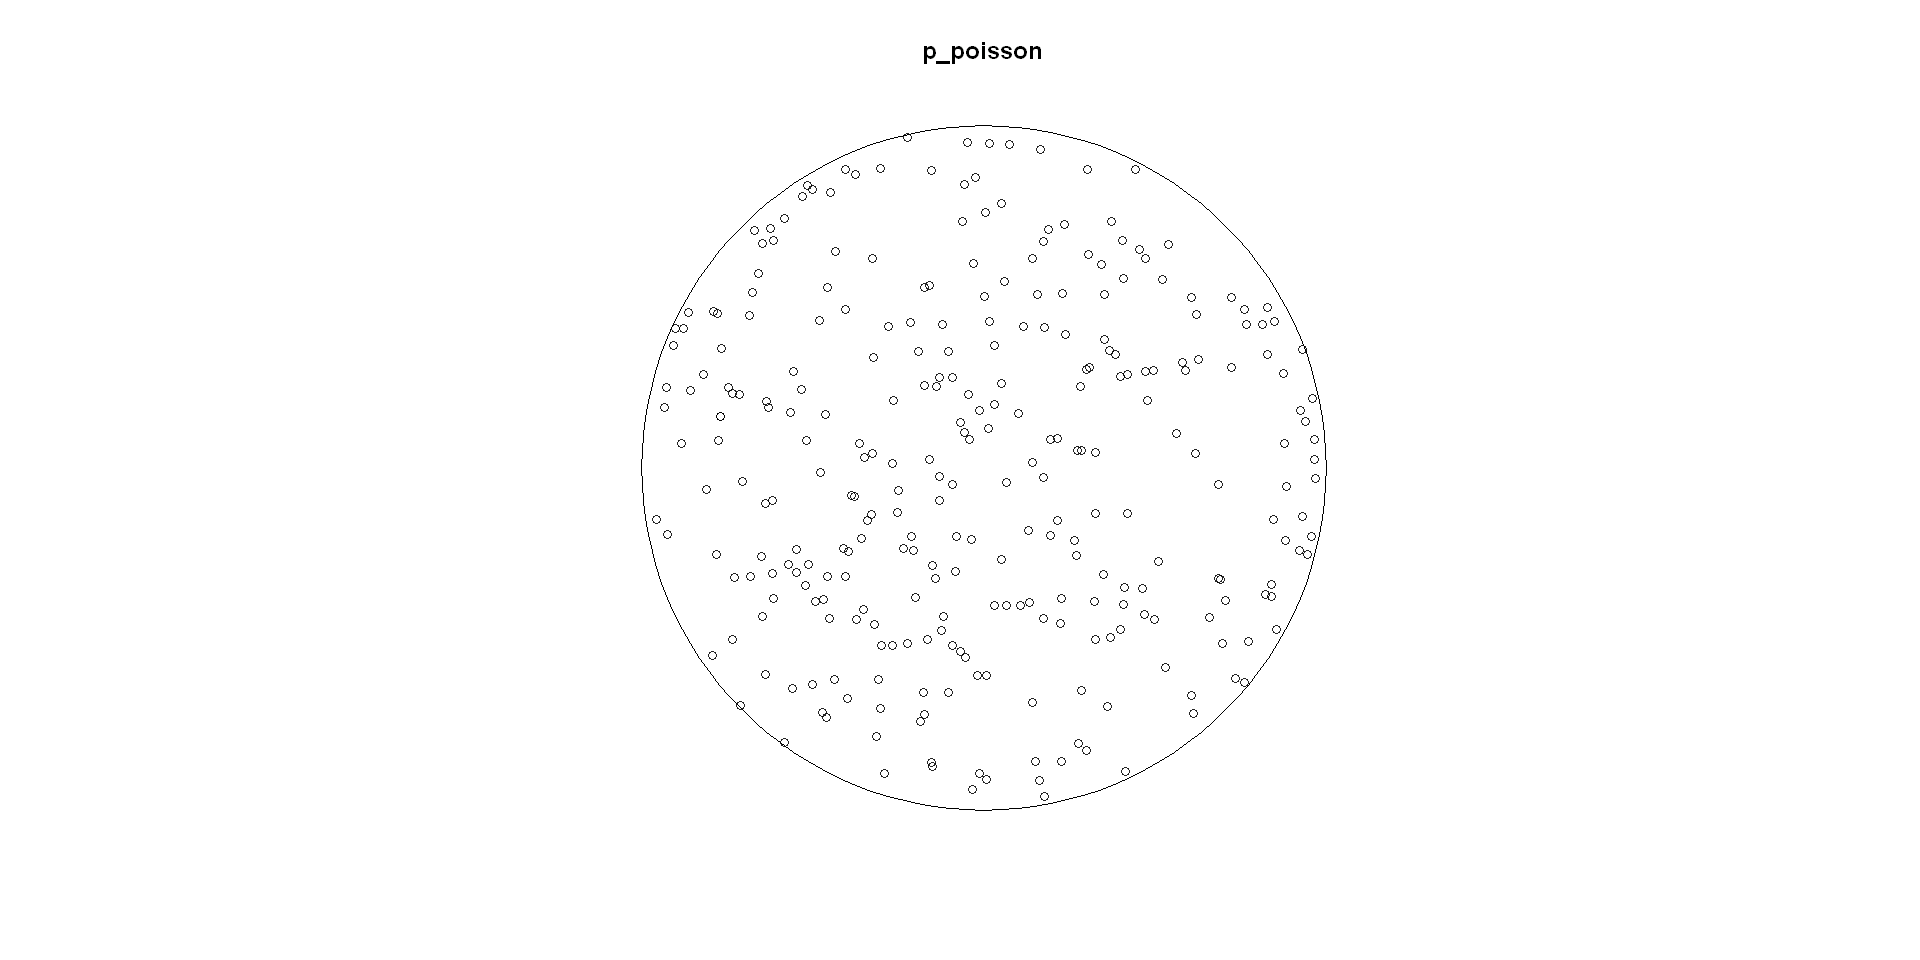

In [2]:
# Utworzenie okna przestrzennego - okręgu o promieniu 10
win_circle <- disc(radius = 10)

# Generowanie zbioru punktowego Poissona z intensywnością obliczoną na podstawie promienia
p_poisson <- rpoispp(lambda = 300 / (pi * 10^2), win = win_circle)

options(repr.plot.width = 16, repr.plot.height = 8) # Ustawienie szerokości okna wykresu

# Wyświetlenie wygenerowanego zbioru punktowego
plot(p_poisson, main = "p_poisson")

#### 3. Utworzenie zbioru punktowego nr 2

Utwórz zbiór punktowy o rozkładzie regularnym `(p_regular)` realizującym `proces Straussa`. Losowy zbiór punktowy
Straussa może być wygenerowany za pomocą funkcji `rStrauss()`. Określ parametry:
intensywności, okna (okręg o promieniu 10) oraz parametru gamma, który określa interakcję
między punktami. Używając helpa, sprawdź jakie wartości mogą przyjmować wartości
argumentów tej funkcji. 


Warning message:
"Simulation will be performed in the containing rectangle and clipped to the original window."


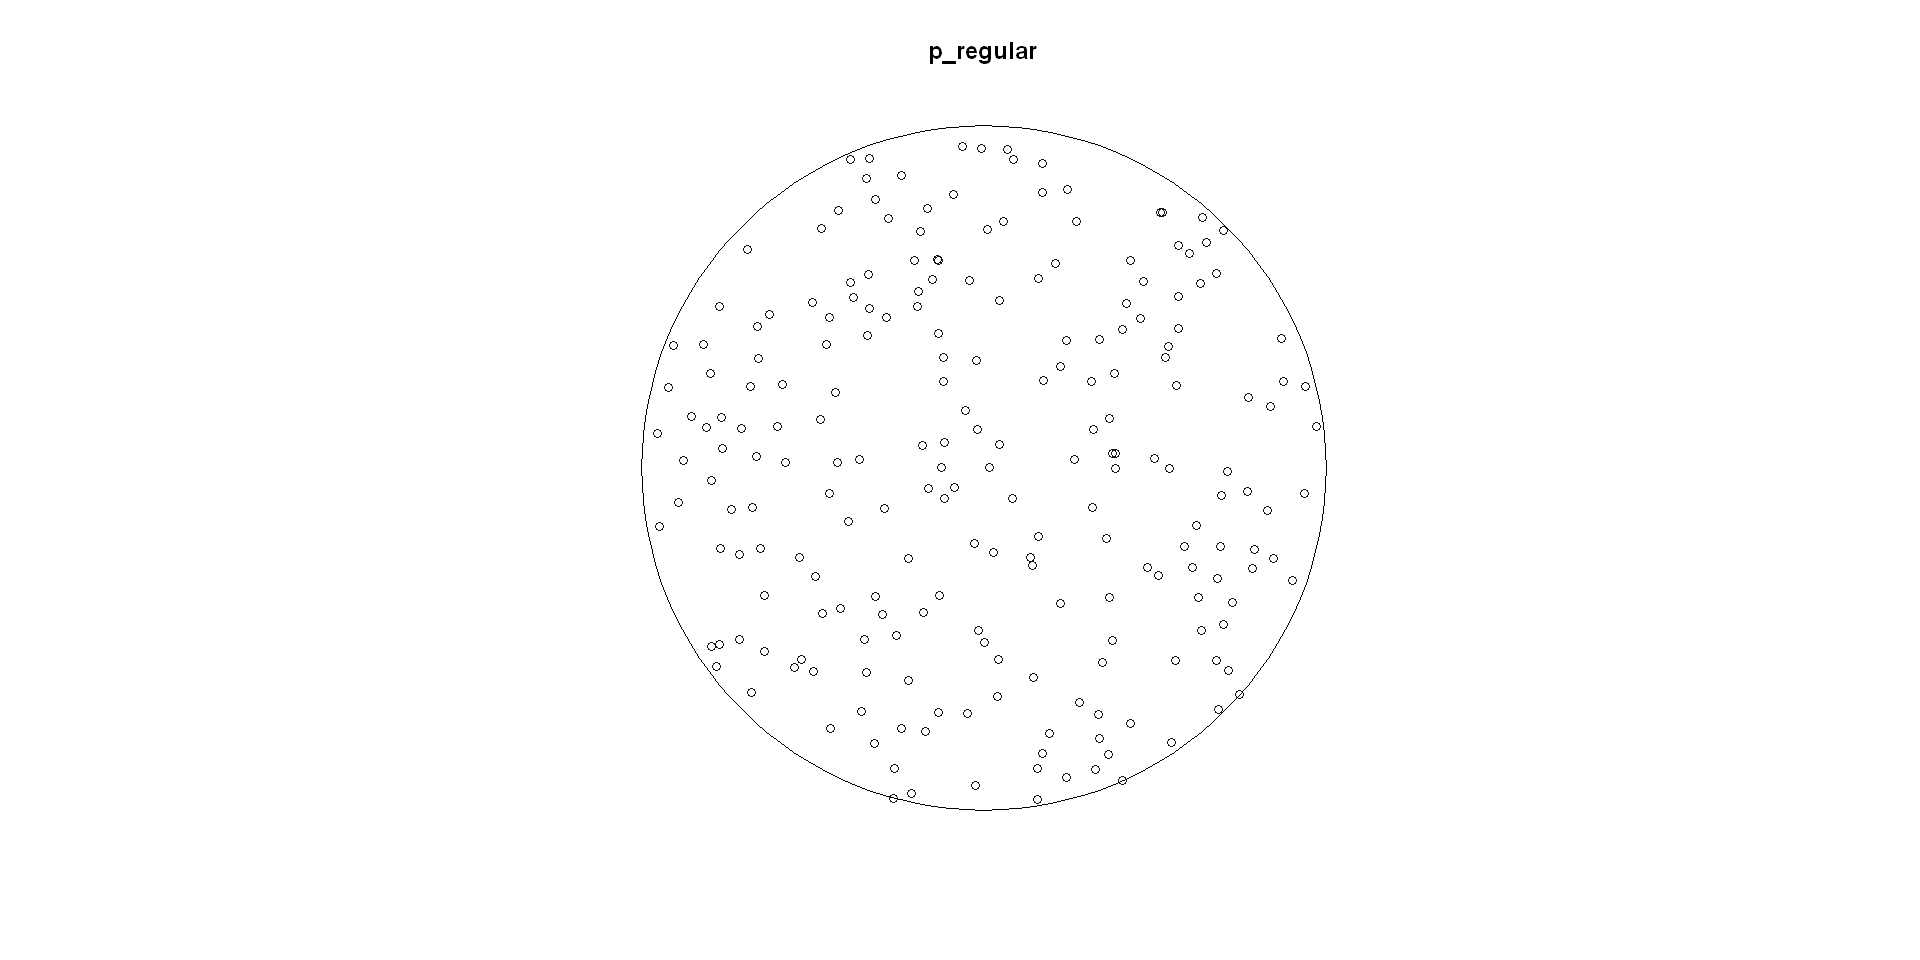

In [3]:
# Definiowanie parametrów procesu Straussa
beta_value <- 300 / (pi * 10^2)  # Intensywność procesu (lambda) jako liczba punktów na jednostkę powierzchni
gamma_value <- 0.5              # Parametr interakcji między punktami
r_value <- 0.5                  # Promień oddziaływania punktów

# Generowanie zbioru punktowego procesu Straussa
p_regular <- rStrauss(beta = beta_value, gamma = gamma_value, R = r_value, W = win_circle)

options(repr.plot.width = 16, repr.plot.height = 8) # Ustawienie szerokości okna

# Wyświetlenie wygenerowanego zbioru punktowego
plot(p_regular, main = "p_regular")

#### 4. Utworzenie zbioru punktowego nr 3

Utwórz zbiór punktowy o rozkładzie pogrupowanym, z tendencją do klasteryzacji `(p_cluster)`. Wygeneruj proces
rodzicielski o niskiej intensywności κ i utwórz punkty potomne o intensywności µ. Punkty
utwórz wewnątrz okręgu o promieniu 10. Zastosuj `proces Materna` do utworzenia procesów
potomnych używając funkcji `rMatClust()`. 

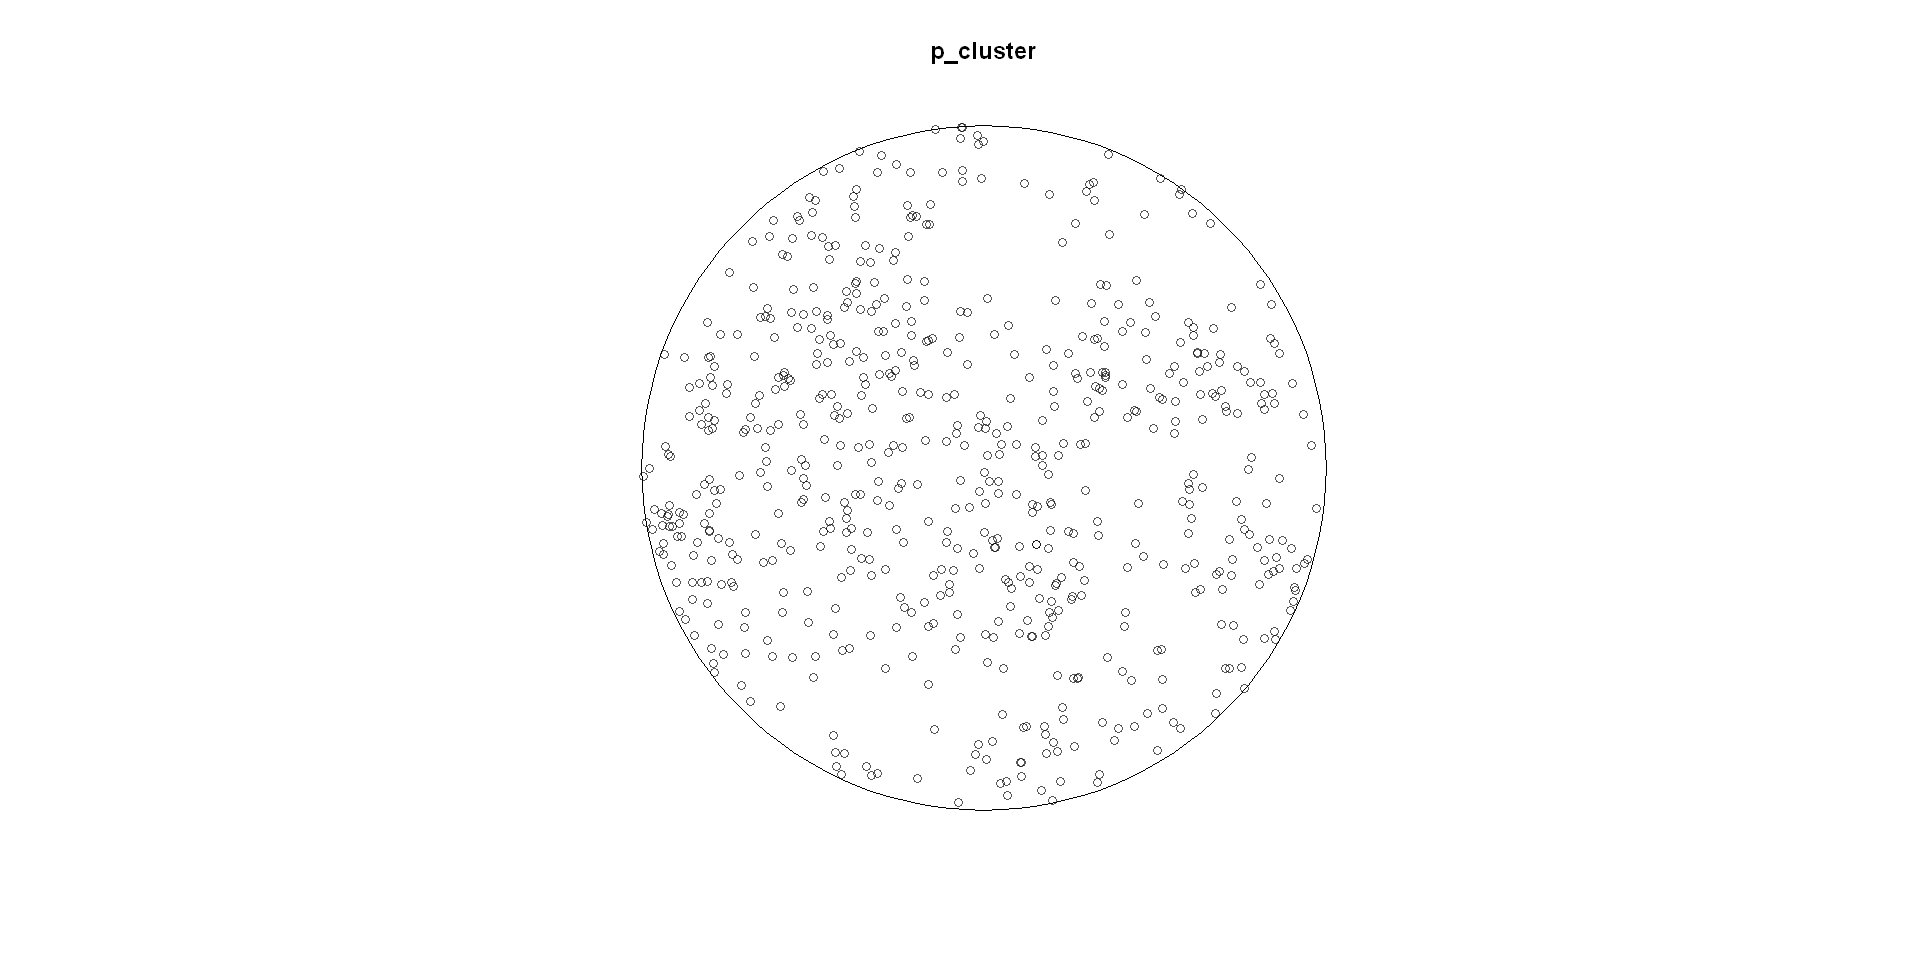

In [4]:
kappa_value <- 0.2  # Intensywność procesu rodzicielskiego
r_cluster <- 2      # Promień wokół każdego punktu rodzicielskiego
mu_value <- 10      # Średnia liczba punktów potomnych na każdy punkt rodzicielski

# Generowanie procesu z klasteryzacją (proces Matérna)
p_cluster <- rMatClust(kappa = kappa_value, r = r_cluster, mu = mu_value, win = win_circle)

options(repr.plot.width = 16, repr.plot.height = 8) # Ustawienie szerokości okna

# Wyświetlenie wygenerowanego zbioru punktowego
plot(p_cluster, main = "p_cluster")

#### 5. Wyświetlenie wszystkich zbiorów
Wyświetl wszystkie trzy zbiory obok siebie.

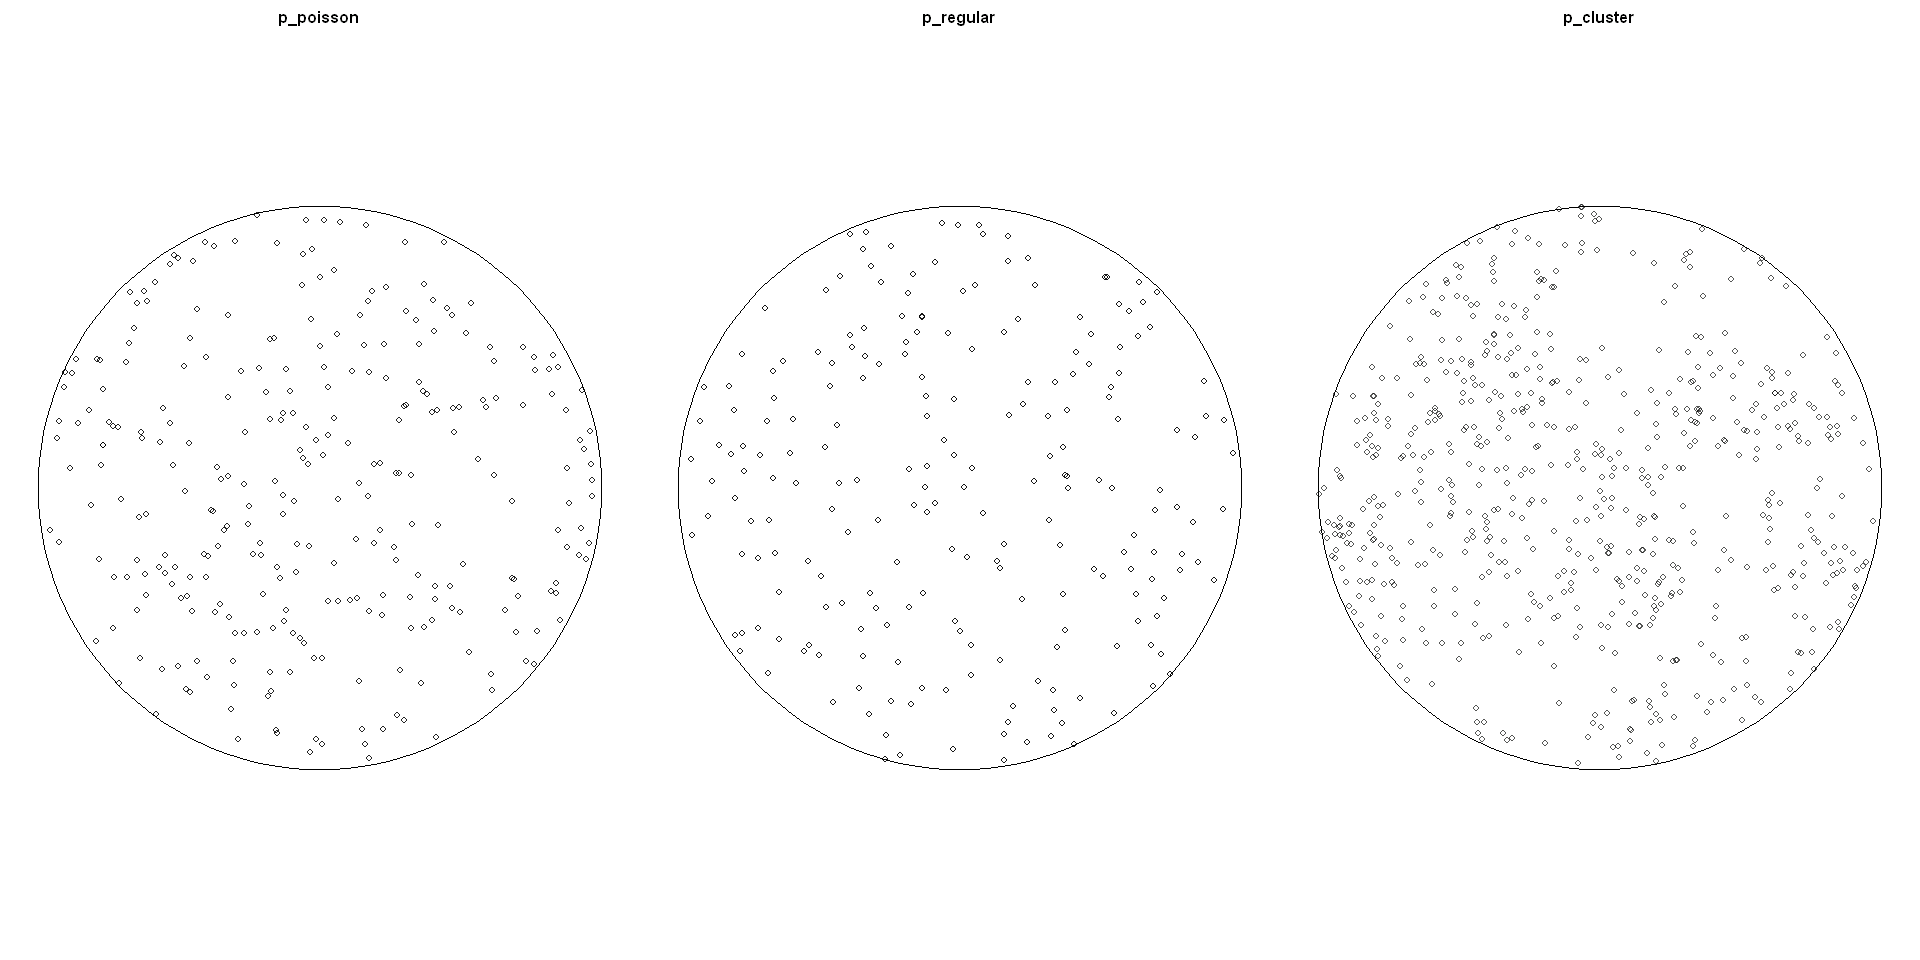

In [5]:
options(repr.plot.width = 16, repr.plot.height = 8) # Ustawienie szerokości okna

# Wyświetlenie wszystkich trzech zbiorów obok siebie
par(mfrow = c(1, 3), mar = c(1, 1, 2, 1)) # Ustawienie układu trzech wykresów obok siebie oraz marginesów

plot(p_poisson, main = "p_poisson") # Wykres punktów Poissona
plot(p_regular, main = "p_regular") # Wykres punktów Strauss'a
plot(p_cluster, main = "p_cluster") # Wykres punktów Matérn Cluster

#### 6. Obliczenie odległości każdego punktu do jego najbliższego sąsiada i wyśweitlenie histogramu
Dla wszystkich trzech zbiorów oblicz odległości każdego punktu do jego najbliższego sąsiada.
Funkcja nndist() w spatstat przyjmuje wzorzec punktowy i dla każdego punktu zwraca
odległość do jego najbliższego sąsiada. Wykreśl histogram obliczonych odległości dla każdego
zbioru. 

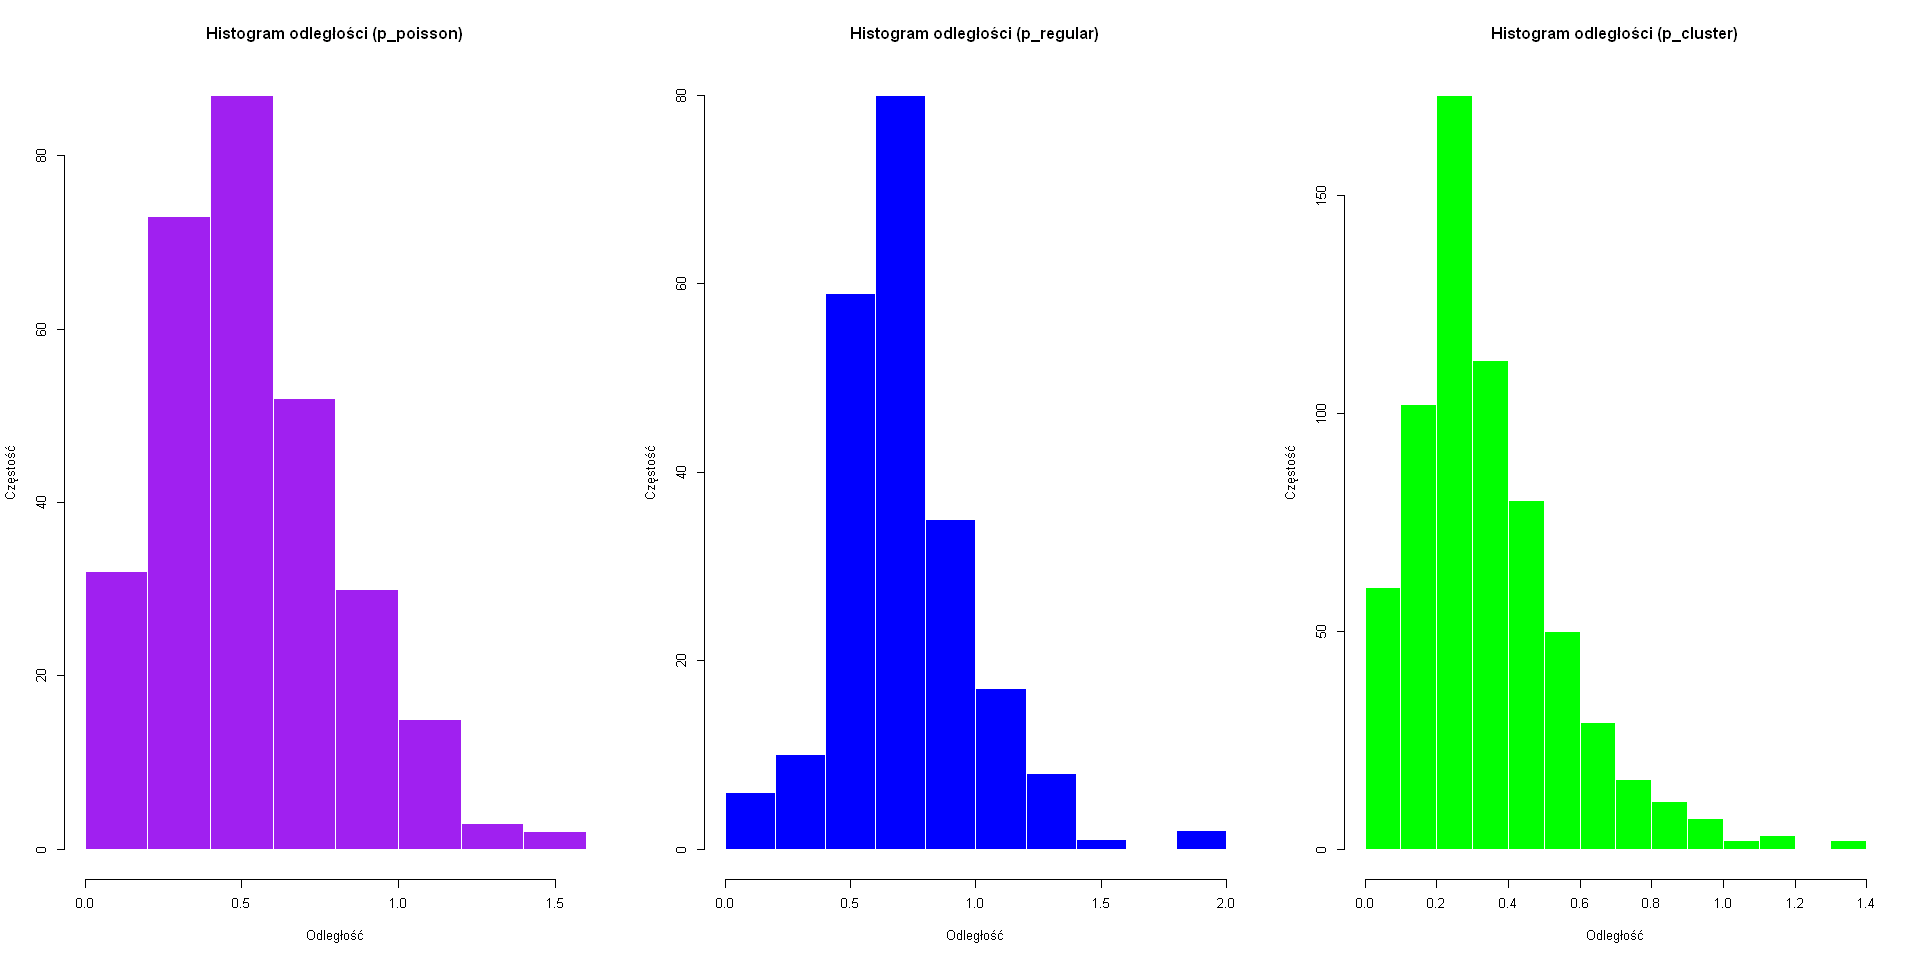

In [6]:
# Obliczanie odległości do najbliższego sąsiada:
dist_poisson <- nndist(p_poisson) # Obliczenie odległości najbliższych sąsiadów dla punktów Poissona
dist_regular <- nndist(p_regular) # Obliczenie odległości najbliższych sąsiadów dla punktów Strauss'a
dist_cluster <- nndist(p_cluster) # Obliczenie odległości najbliższych sąsiadów dla punktów Matérn Cluster

options(repr.plot.width = 16, repr.plot.height = 8) # Ustawienie szerokości okna

par(mfrow = c(1, 3)) # Ustawienie układu trzech wykresów obok siebie

# Histogram dla p_poisson
hist(dist_poisson, main = "Histogram odległości (p_poisson)", xlab = "Odległość", ylab = "Częstość", col = "purple", border = "white")

# Histogram dla p_regular
hist(dist_regular, main = "Histogram odległości (p_regular)", xlab = "Odległość", ylab = "Częstość", col = "blue", border = "white")

# Histogram dla p_cluster
hist(dist_cluster, main = "Histogram odległości (p_cluster)", xlab = "Odległość", ylab = "Częstość", col = "green", border = "white")